# Errors
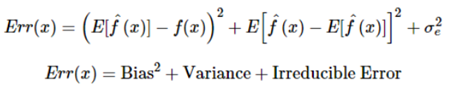

Error의 세가지 요소 : bias, variance, inreducible error
- Bias : Bias가 높다 = underfitting
- Variance : Variance가 높다 = overfitting
- inreducible error : 줄일 수 없는 error
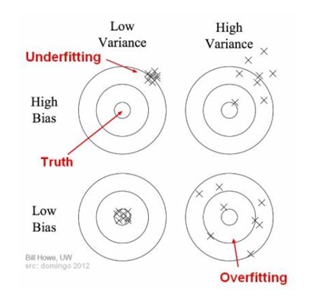

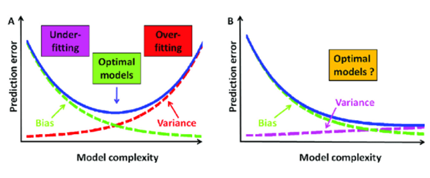

model complex ∝variance ∝1/bias
model complex 최소가 되는 opimal point를 찾아야 한다.

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 
import warnings
warnings.filterwarnings("ignore")

iris = load_iris()
X = pd.DataFrame(iris.data, columns = iris.feature_names)

y = pd.Series(iris.target, dtype="category")
y = y.cat.rename_categories(iris.target_names) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=48)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Types of ensembling

## Basic Ensemble Techniques
- Max Voting
- Averaging
- Weighted Average

## Max Voting(Majority Voting)

복수의 모델을 사용하여, 가장 많이 voting(prediction)된 모델을 사용한다

- haed voting : 단순 투표. 개별 모형의 결과 기준
- soft voting : 가중치 투표. 각 분류기의 예측을 평균내어 확률이 가장 높은 클래스

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from statistics import mode
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict(X_test)
pred2=model2.predict(X_test)
pred3=model3.predict(X_test)

final_pred = np.array([])
for i in range(0,len(X_test)):
    final_pred = np.append(final_pred, mode([pred1[i], pred2[i], pred3[i]]))

In [3]:
final_pred

array(['versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'setosa', 'virginica', 'virginica', 'versicolor'],
      dtype='<U32')

In [4]:
final_pred == y_test

96      True
73      True
134     True
41      True
70     False
116     True
19      True
138     True
33      True
89      True
137     True
36      True
20      True
126     True
87      True
56      True
11      True
62      True
72      True
120     True
8       True
147     True
77     False
86      True
129     True
4       True
31      True
136     True
132     True
88      True
dtype: bool

In [5]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
#hard voting
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8666666666666667

In [6]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='soft')
#soft voting
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9

## Averaging
모든 model에서 평균 예측을 가져 와서 최종 예측에 사용함. 평균화는 회귀 문제에서 예측을 하거나 분류 문제의 확률을 계산하는 데 사용할 수 있음. 평균화 방법은 모든 값의 평균을 취함.

In [7]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1+pred2+pred3)/3


In [8]:
finalpred

array([[1.60332728e-02, 9.57031993e-01, 2.69347338e-02],
       [3.92383807e-03, 9.62232858e-01, 3.38433034e-02],
       [3.92262179e-04, 2.37056384e-01, 7.62551354e-01],
       [6.59764532e-01, 3.40227782e-01, 7.68655104e-06],
       [6.27883384e-03, 3.36296858e-01, 6.57424308e-01],
       [2.86128290e-04, 7.15921473e-02, 9.28121724e-01],
       [9.97794856e-01, 2.20509439e-03, 4.94510531e-08],
       [2.21928452e-03, 3.26716724e-01, 6.71063992e-01],
       [9.99229843e-01, 7.70149883e-04, 7.16431712e-09],
       [5.72428730e-03, 9.64799819e-01, 2.94758941e-02],
       [5.34401713e-04, 7.54536427e-02, 9.24011956e-01],
       [9.89107684e-01, 1.08921658e-02, 1.50332174e-07],
       [9.81463914e-01, 1.85356375e-02, 4.48108090e-07],
       [6.51132903e-04, 1.83421544e-01, 8.15927323e-01],
       [4.25560832e-04, 8.15963222e-01, 1.83611217e-01],
       [9.89892799e-03, 8.20900756e-01, 1.69200316e-01],
       [9.93886174e-01, 6.11369067e-03, 1.35174089e-07],
       [1.05525659e-03, 9.88746

## Weight Average
각 모델의 중요성을 정의하는 서로 다른 가중치가 할당됨.

In [9]:
model1 = tree.DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)

pred1=model1.predict_proba(X_test)
pred2=model2.predict_proba(X_test)
pred3=model3.predict_proba(X_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)

In [10]:
finalpred

array([[1.92399274e-02, 9.48438392e-01, 3.23216805e-02],
       [4.70860569e-03, 9.54679430e-01, 4.06119641e-02],
       [4.70714615e-04, 2.64467661e-01, 7.35061625e-01],
       [6.51717438e-01, 3.48273338e-01, 9.22386125e-06],
       [7.53460060e-03, 3.43556230e-01, 6.48909169e-01],
       [3.43353948e-04, 8.59105767e-02, 9.13746069e-01],
       [9.97353827e-01, 2.64611326e-03, 5.93412637e-08],
       [2.66314142e-03, 3.32060068e-01, 6.65276790e-01],
       [9.99075812e-01, 9.24179860e-04, 8.59718054e-09],
       [6.86914476e-03, 9.57759782e-01, 3.53710730e-02],
       [6.41282055e-04, 9.05443712e-02, 9.08814347e-01],
       [9.86929221e-01, 1.30705990e-02, 1.80398609e-07],
       [9.77756697e-01, 2.22427649e-02, 5.37729708e-07],
       [7.81359484e-04, 2.00105853e-01, 7.99112788e-01],
       [5.10672998e-04, 8.19155867e-01, 1.80333460e-01],
       [1.18787136e-02, 8.05080907e-01, 1.83040379e-01],
       [9.92663409e-01, 7.33642880e-03, 1.62208907e-07],
       [1.26630790e-03, 9.86495

# Advanced Ensemble techniques

## Bagging

배깅은 Bootstrap을 하여 각 모델을 학습시켜 결과물을 집계 하는 방법 동일한 모델 을 사용하여 데이터 만 분할하여 여러개 모델을 학습 .
배깅은 부트스트래핑과 유사하게 트레이닝 데이터를 랜덤하게 선택해서 다수결 모형을 적용.


### Stability and Accuracy

각 예측 set를 저장하고 이를 평균화하면 편차에 영향을 주지 않고 분산을 낮출뿐만 아니라 정확도를 향상시킬 수 있음. 많은 다른 모델들을 만들고 함께 모으면 과적합을 피하고, 예측을 안정화하며 정확도를 높일 수 있음. 데이터엔 variance가 존재하고, 그렇지않다면 bagging은 도움이 되지 않음. 배깅은 bootstrapping의 통계적 방법을 기반으로 함.

1. 대체를 통해 subset을 만듬.
2. 샘플의 모든 subset에 모델을 적용함.
3. 모델은 병렬로 실행되며 서로 독립적임.
4. 각 모델을 사용하여 x- text 예측
5. 예측을 집계(투표 또는 평균화)하여 최종 예측을 형성.

### Bagging algorithms
- Bagging meta-estimator
- Random forest

#### Bagging meta-estimator
분류(BaggingClassifier) 및 회귀(BaggingReprovator) 문제에 모두 사용할 수 있는 앙상블 알고리즘. 전형적인 백킹 기법을 따라 예측

#### Algorithm
1. Random subset은 원래 dataset에서 생성(Booststrapping)
2. Subset에는 모든 feature포함
3. 사용자 지정 base estimator는 각 smaller set에 fit
4. 각 모델의 예측을 조합하여 최종 결과를 얻는다.

#### parameter
- base_estimator : default=DT
- n_estimatorts : base estimator의 개수 (n_estimators ∝ processing speed ∝ best result)
- max_samples : 각 base estimator를 train할 최대 샘플 수. subset의 크기를 결정
- max_features : 각 base estimatort를 train하는데 필요한 최대 feature 수. 전체 data set의 sub set크기 결정 
- n_jobs : 병렬 처리 할 작업의 수 (core의 수 고려)
- random_state : ransdom split method


In [13]:
from sklearn.ensemble import BaggingClassifier
final_dt = tree.DecisionTreeClassifier(max_leaf_nodes=10, max_depth=5)                   
final_bc = BaggingClassifier(base_estimator=final_dt, n_estimators=40, random_state=1, oob_score=True)

final_bc.fit(X_train, y_train)
final_preds = final_bc.predict(X_test)


acc_oob = final_bc.oob_score_
print(acc_oob)  

0.9583333333333334


### Random Forest

랜덤 포레스트는 배깅 기술을 따르는 또 다른 앙상블 머신 러닝 알고리즘. 이는 bagging estimator 알고리즘의 연장으로 볼 수 있음. random forest의 기본 estimator는 결정 트리이고, random forest는 결정 트리의 각 노드에서 최상의 분할을 결정하는 데 사용되는 feature set을 무작위로 선택.
단계별 Random Forest가 하는 일
1. Random subset은 원래 dataset에서 생성(Booststrapping)
2. Decision Tree의 각 node에서는 feature의 Random set만이 split을 결정한다.
3. 각 sub set에 DT가 fit된다. 최종 예측은 모든 DT의 예측의 평균으로 계산한다.
즉, Random으로 data point와 feature를 선택하고, multiple tree(forest)를 만든다.

#### parameter
- n_estimators : Random Forest에 생성될 DT의 수 (n_estimators ∝ stability ∝ processing time) 
- criterion : split의 사용할 기능
- max_features : 각 DT의 split에 사용 될 feature의 최대 개수 (max_features ∝ performance ∝ divergence)
- max_depth : 트리의 최대 깊이
- min_samples_leaf : leaf node의 최소 sample 수
- max_leaf_nodes : 최대 leaf node 수 
- n_jobs : 병렬 처리 할 작업의 수 (core의 수 고려)


In [12]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9

# Boosting

부스팅은 weak learner를 strong learner로 전환시키는 알고리즘 군을 의미. 부스팅은 주어진 학습 알고리즘의 모델 예측을 개선하기위한 앙상블 방법. 부스팅의 개념은 weak learner들을 순차적으로 훈련시키는 것. 부스팅은 "팀워크"에 관한 것 -> 실행되는 각 모델은 다음 모델이 집중할 feature를 결정.

### AdaBoost

어댑티브 부스팅 또는 AdaBoost는 가장 간단한 부스팅 알고리즘 중 하나. 일반적으로 결정 트리는 모델링에 사용되고, 마지막 모델의 오류를 수정하는 여러 순차 모델이 작성됨. AdaBoost는 잘못 예측 된 관측치에 가중치를 할당하고 후속 모델은 이러한 값을 올바르게 예측.

1. 데이터 세트의 모든 관측치에 동일한 가중치가 부여.
2. 모델은 데이터의 하위 집합을 기반으로 함.
3. 이 모델을 사용하여 전체 data set에 대한 예측이 이루어짐.
4. 오류는 예측과 실제 값을 비교하여 계산.
5. 다음 모델을 생성하는 동안 잘못 예측 된 데이터 포인트에 더 높은 가중치 부여.
6. 오차 값을 사용하여 가중치를 결정할 수 있습니다. 예를 들어, 오차가 높을수록 관측치에 할당 된 가중치가 더 커짐.
7. 이 과정은 error function이 변경되지 않거나 추정기 수의 최대 한계에 도달 할 때까지 반복.

#### Parameter
- base_estimators: 기본 추정기의 유형, 즉 기본 학습자로 사용될 기계 학습 알고리즘을 지정하는 데 도움이 됨.
- n_estimators : base estimator의 개수, 기본값은 10이지만 더 나은 성능을 얻으려면 더 높은 값을 유지해야 함.
- learning_rate: 최종 조합에서 추정량의 기여도를 제어. learning_rate와 n_estimators 사이에는 상충 관계가 있음.
- max_depth: individual estimator의 최대 깊이. 최상의 성능을 위해이 매개 변수를 조정.
- n_jobs: 병렬 처리 할 작업의 수 (core의 수 고려)
- random_state : Random data split을 지정하는 정수 값. random_state의 한정된 값은 동일한 매개 변수 및 학습 데이터가 제공되는 경우 항상 동일한 결과를 생성.

# Stacking

부스팅과 유사하게 원본 데이터에 여러 모델을 적용 할 수도 있음. 차이점은 가중치 함수에 대한 경험적 공식이 아니라 메타 레벨을 도입하고 다른 모델 , 접근법을 사용하여 가중치를 추정하기 위해 모든 모델의 output과 함께 input을 추정하는 것. 즉, 어떤 모델이 잘 수행되고 어떤 입력 데이터에 나쁜 영향을 주었는지 확인하는 것